In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

import json

from MediaContributions import MediaContributionCalculator

# Tests

In [84]:
model_data = pd.read_csv('model_data.csv')
model_spec = {
    'Target variables': [
        #'TBCA Oxota', 'OOH Oxota', 'Trial Oxota', 'Unaided Oxota', 'Consider T1 Oxota'
        'TBCA Oxota', 'OOH Oxota',
    ], 
    'Campaign variables': [
        {'Name': 'OOH freq',     'Alpha': 2, 'Gamma': 12}, 
        {'Name': 'Instore freq', 'Alpha': 2, 'Gamma': 4}, 
        {'Name': 'Bar freq',     'Alpha': 8, 'Gamma': 4},
    ], 
    'Other variables': ['Volume', 'Media coverage'], 
    'Relevance groups variable': 'Buy m.o. Oxota',
    'Subsample variables': ['Trial Oxota'] 
}

xmc = MediaContributionCalculator(p_value=0.05, correct_base=False)
model_spec = xmc.CheckFixSpec(model_data, model_spec)
result = xmc.GetContributions(model_data, model_spec)
#result = xmc.DEBUG(model_data, model_spec)

result #.to_csv('1.csv')


In [15]:
# Test ContributionsMultiTarget
model_data = pd.read_csv('model_data.csv')
model_spec = {
    'Target variables': [
        #'TBCA Oxota', 'OOH Oxota', 'Trial Oxota', 'Unaided Oxota', 'Consider T1 Oxota'
        'TBCA Oxota', 'OOH Oxota',
    ], 
    'Campaign variables': [
        {'Name': 'OOH freq',     'Alpha': 8, 'Gamma': 6}, 
        {'Name': 'Instore freq', 'Alpha': 2, 'Gamma': 2}, 
        {'Name': 'Bar freq',     'Alpha': 8, 'Gamma': 6},
    ], 
    'Other variables': ['Volume', 'Media coverage'], 
    'Relevance groups variable': 'Buy m.o. Oxota',
    'Subsample variables': ['Trial Oxota'] 
}

xmc = MediaContributionCalculator(p_value=0.05, correct_base=True)
model_spec = xmc.CheckFixSpec(model_data, model_spec)

result = xmc.GetContributions(model_data, model_spec)
result
#result.to_csv('2.csv')

TBCA Oxota OOH Oxota
Total == all        OOH freq_dr            0.0       0.0
                    Instore freq_dr   0.210558       0.0
                    Bar freq_dr            0.0  0.002532
                    Volume           -0.036161       0.0
                    Media coverage    0.024932  0.013175
                    Base              0.417338   0.12715
                    Observed value    0.616667  0.142857
Buy m.o. Oxota == 0 OOH freq_dr            0.0       0.0
                    Instore freq_dr   0.207555       0.0
                    Bar freq_dr            0.0  0.003654
                    Volume                 0.0       0.0
                    Media coverage    0.019403  0.019016
                    Base              0.329743  0.094169
                    Observed value    0.556701  0.116838
Buy m.o. Oxota == 1 OOH freq_dr            0.0       0.0
                    Instore freq_dr   0.217332       0.0
                    Bar freq_dr            0.0       0.0
                    Volume           -0.117735       0.0
                    Media coverage    0.037404       0.0
                    Base              0.614936   0.20155
                    Observed value    0.751938   0.20155
Trial Oxota == 0    OOH freq_dr            0.0       0.0
                    Instore freq_dr   0.168077       0.0
                    Bar freq_dr            0.0  0.000101
                    Volume                 0.0       0.0
                    Media coverage    0.024027  0.023547
                    Base              0.275981  0.061458
                    Observed value    0.468085  0.085106
Trial Oxota == 1    OOH freq_dr            0.0       0.0
                    Instore freq_dr   0.215911       0.0
                    Bar freq_dr            0.0  0.002838
                    Volume           -0.040718       0.0
                    Media coverage    0.025046  0.011868
                    Base               0.43515  0.135428
                    Observed value    0.635389  0.150134

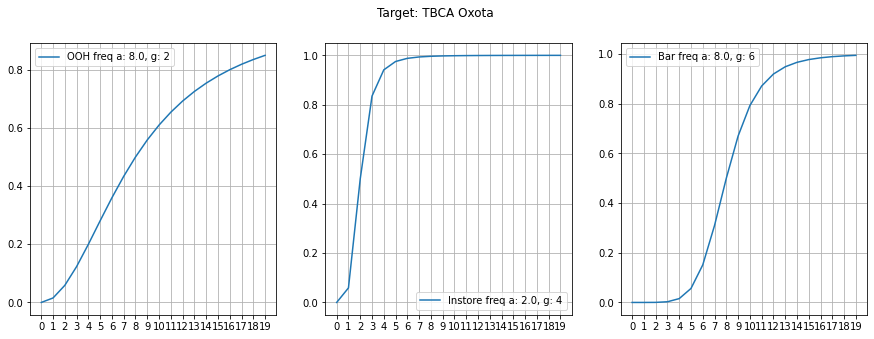

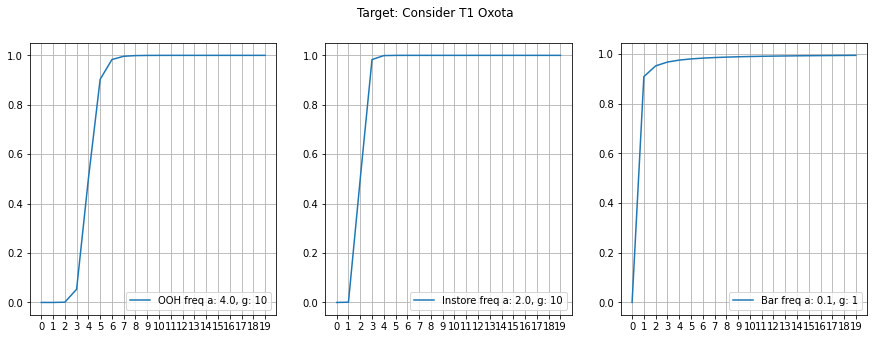

TBCA Oxota Consider T1 Oxota
Total == all        OOH freq_dr            0.0               0.0
                    Instore freq_dr   0.165808          0.032529
                    Bar freq_dr            0.0               0.0
                    Volume                 0.0               0.0
                    Media coverage    0.024338               0.0
                    Base              0.426521           0.31509
                    Observed value    0.616667          0.347619
Buy m.o. Oxota == 0 OOH freq_dr            0.0               0.0
                    Instore freq_dr   0.165806          0.046949
                    Bar freq_dr            0.0               0.0
                    Volume                 0.0               0.0
                    Media coverage     0.01903               0.0
                    Base              0.371865          0.052708
                    Observed value    0.556701          0.099656
Buy m.o. Oxota == 1 OOH freq_dr            0.0               0.0
                    Instore freq_dr   0.165812               0.0
                    Bar freq_dr            0.0               0.0
                    Volume                 0.0               0.0
                    Media coverage    0.036312               0.0
                    Base              0.549814          0.906977
                    Observed value    0.751938          0.906977
Trial Oxota == 0    OOH freq_dr            0.0               0.0
                    Instore freq_dr   0.132978          0.039349
                    Bar freq_dr            0.0               0.0
                    Volume                 0.0               0.0
                    Media coverage    0.023564               0.0
                    Base              0.311543         -0.018072
                    Observed value    0.468085          0.021277
Trial Oxota == 1    OOH freq_dr            0.0               0.0
                    Instore freq_dr   0.169945          0.031669
                    Bar freq_dr            0.0               0.0
                    Volume                 0.0               0.0
                    Media coverage    0.024435               0.0
                    Base              0.441009          0.357071
                    Observed value    0.635389           0.38874

In [33]:
# Test ContributionsMultiTarget
model_data = pd.read_csv('model_data.csv')
model_spec = {
    'Target variables': [
        #'TBCA Oxota', 'OOH Oxota', 'Trial Oxota', 'Unaided Oxota', 'Consider T1 Oxota'
        'TBCA Oxota', 'Consider T1 Oxota',
    ], 
    'Campaign variables': [
        {'Name': 'OOH freq',     'Alpha': 2, 'Gamma': 12}, 
        {'Name': 'Instore freq', 'Alpha': 2, 'Gamma': 4}, 
        {'Name': 'Bar freq',     'Alpha': 8, 'Gamma': 4},
    ], 
    'Other variables': ['Volume', 'Media coverage'], 
    'Relevance groups variable': 'Buy m.o. Oxota',
    'Subsample variables': ['Trial Oxota'] 
}

xmc = MediaContributionCalculator(p_value=0.1, correct_base=True)
model_spec = xmc.CheckFixSpec(model_data, model_spec)

result = xmc.GetContributions(model_data, model_spec, auto_diminishing_return=True)
result

In [409]:
# Test RunFromFilesSpec

#xmc = MediaContributionCalculator(p_value=0.1)
#xmc.RunModelFromFilesSpec('model_data.csv', 'model_spec.json', 'outfile')